<a href="https://colab.research.google.com/github/Parinita-Jain/DeepLearning/blob/main/DeepLearning_on_loan_prediction_data_with_hyperparameter_tunining_model_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data=pd.read_csv("loan_prediction_data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0.000000,1,0,0.070489,0.000000,0.198860,0.74359,1,1.0,1
1,LP001003,0,1,0.333333,1,0,0.054830,0.036192,0.172214,0.74359,1,0.0,0
2,LP001005,0,1,0.000000,1,1,0.035250,0.000000,0.082489,0.74359,1,1.0,1
3,LP001006,0,1,0.000000,0,0,0.030093,0.056592,0.160637,0.74359,1,1.0,1
4,LP001008,0,0,0.000000,1,0,0.072356,0.000000,0.191027,0.74359,1,1.0,1


In [5]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area        float64
Loan_Status            int64
dtype: object

In [7]:
data.drop("Loan_ID",axis=1,inplace=True)

In [8]:
X=data.drop("Loan_Status",axis=1)
y=data["Loan_Status"]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=10,test_size=0.2,stratify=y)

In [34]:
import keras 
from keras import Input,Model
from keras.layers import InputLayer,Dense
from keras.models import Sequential
import tensorflow as tf

In [11]:
input_neurons=xtrain.shape[1]
output_neurons=1
no_of_hidden_layers=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5

In [38]:
model=tf.keras.Sequential([Input(shape=(input_neurons,)),
                           Dense(units=neuron_hidden_layer_1,activation="relu"),
                           Dense(units=neuron_hidden_layer_2,activation="relu"),
                           Dense(units=output_neurons,activation="sigmoid")])

'''
X=tf.keras.Sequential([Input(shape=(input_neurons,)),
hidden1=Dense(units=neuron_hidden_layer_1,activation="relu")(X),
hidden2=Dense(units=neuron_hidden_layer_2,activation="relu")(hidden1),
output=Dense(units=output_neurons,activation="sigmoid")(hidden2)])
#model_functional=Model(X,output)
'''

'\nX=tf.keras.Sequential([Input(shape=(input_neurons,)),\nhidden1=Dense(units=neuron_hidden_layer_1,activation="relu")(X),\nhidden2=Dense(units=neuron_hidden_layer_2,activation="relu")(hidden1),\noutput=Dense(units=output_neurons,activation="sigmoid")(hidden2)])\n#model_functional=Model(X,output)\n'

In [39]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [40]:
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 21ms/step - loss: 0.5902 - accuracy: 0.6864 - val_loss: 0.5862 - val_accuracy: 0.6911
Epoch 2/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.6864 - val_loss: 0.5812 - val_accuracy: 0.6911
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.5809 - accuracy: 0.6864 - val_loss: 0.5769 - val_accuracy: 0.6911
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5764 - accuracy: 0.6864 - val_loss: 0.5739 - val_accuracy: 0.6911
Epoch 5/20
16/16 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.6864 - val_loss: 0.5701 - val_accuracy: 0.6911
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5699 - accuracy: 0.6864 - val_loss: 0.5670 - val_accuracy: 0.6911
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5658 - accuracy: 0.6864 - val_loss: 0.5633 - val_accuracy: 0.6992
Epoch 8/20
16/16 [

In [41]:
prediction=model.predict(xtest)
prediction

4/4 [==============================] - 0s 5ms/step


array([[0.7121909 ],
       [0.6568916 ],
       [0.71209985],
       [0.7528896 ],
       [0.82743686],
       [0.6331347 ],
       [0.8159458 ],
       [0.7512207 ],
       [0.8139339 ],
       [0.6425241 ],
       [0.78101516],
       [0.622961  ],
       [0.74307287],
       [0.8169115 ],
       [0.6584804 ],
       [0.7649915 ],
       [0.7614754 ],
       [0.7358593 ],
       [0.7760944 ],
       [0.7518686 ],
       [0.6368715 ],
       [0.83540905],
       [0.7202111 ],
       [0.74688774],
       [0.7410644 ],
       [0.7902615 ],
       [0.774584  ],
       [0.6414551 ],
       [0.7988944 ],
       [0.77642107],
       [0.81519836],
       [0.8353222 ],
       [0.83450186],
       [0.3494205 ],
       [0.37641743],
       [0.4668356 ],
       [0.736204  ],
       [0.82677096],
       [0.7557719 ],
       [0.8205465 ],
       [0.8248574 ],
       [0.64052856],
       [0.77923566],
       [0.8119832 ],
       [0.43536672],
       [0.836359  ],
       [0.79568267],
       [0.728

In [42]:
prediction=prediction.reshape(123,)

In [43]:
prediction_int=prediction>=0.5

In [44]:
prediction_int=prediction_int.astype(np.int)

<ipython-input-44-e98897c67493>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


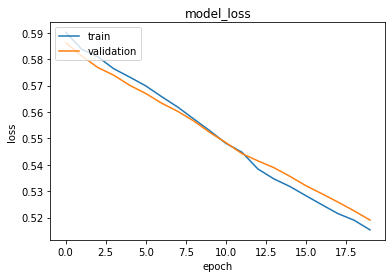

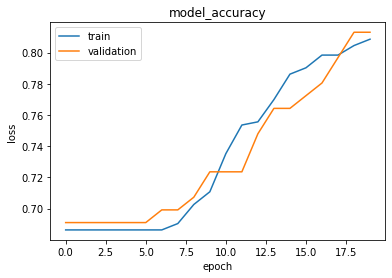

In [45]:
accuracy_score(ytest,prediction_int)
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("model_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()

In [46]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="relu"))
model.add(Dense(units=neuron_hidden_layer_2,activation="relu"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 10)                120       
                                                                 
 dense_15 (Dense)            (None, 5)                 55        
                                                                 
 dense_16 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [47]:
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 0.6751 - accuracy: 0.5988 - val_loss: 0.6584 - val_accuracy: 0.7154
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.7006 - val_loss: 0.6367 - val_accuracy: 0.7154
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6281 - accuracy: 0.7312 - val_loss: 0.6194 - val_accuracy: 0.7236
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7291 - val_loss: 0.6044 - val_accuracy: 0.7236
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5979 - accuracy: 0.7312 - val_loss: 0.5931 - val_accuracy: 0.7317
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5875 - accuracy: 0.7352 - val_loss: 0.5825 - val_accuracy: 0.7317
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.7434 - val_loss: 0.5746 - val_accuracy: 0.7398
Epoch 8/20
16/16 [=

In [48]:
prediction=model.predict(xtest)

4/4 [==============================] - 0s 4ms/step


In [ ]:
# and rest of the steps

In [ ]:
"""
Hyperparameter tuning of NN-
1. Change activation function of hidden layer
2. increase hidden neurons
3. increase hidden layers
4. increase no. of epochs
5. change optimizer
"""

In [54]:


model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                120       
                                                                 
 dense_33 (Dense)            (None, 5)                 55        
                                                                 
 dense_34 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 0.7233 - accuracy: 0.4827 - val_loss: 0.6573 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6484 - accuracy: 0.6415 - val_loss: 0.6108 - val_accuracy: 0.6748
Epoch 3/20
16/16 [=====================

<ipython-input-54-7d227ce3efdb>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [55]:
# increasing hidden neurons



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=1024,activation="tanh"))
model.add(Dense(units=512,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 1024)              12288     
                                                                 
 dense_36 (Dense)            (None, 512)               524800    
                                                                 
 dense_37 (Dense)            (None, 1)                 513       
                                                                 
Total params: 537,601
Trainable params: 537,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 0.6218 - accuracy: 0.7149 - val_loss: 0.5665 - val_accuracy: 0.7967
Epoch 2/20
16/16 [==============================] - 0s 22ms/step - loss: 0.5055 - accuracy: 0.8065 - val_loss: 0.5010 - val_accuracy: 0.8130
Epoch 3/20
16/16 [============

<ipython-input-55-47e6b07e8c20>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [58]:
# increasing hidden layers



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=1000,activation="tanh"))
model.add(Dense(units=100,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 1000)              12000     
                                                                 
 dense_49 (Dense)            (None, 100)               100100    
                                                                 
 dense_50 (Dense)            (None, 10)                1010      
                                                                 
 dense_51 (Dense)            (None, 5)                 55        
                                                                 
 dense_52 (Dense)            (None, 1)                 6         
                                                                 
Total params: 113,171
Trainable params: 113,171
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [=============================

<ipython-input-58-b0a1df52f9d4>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [59]:
# increasing no. of epochs



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))





Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 10)                120       
                                                                 
 dense_54 (Dense)            (None, 5)                 55        
                                                                 
 dense_55 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 29ms/step - loss: 0.5869 - accuracy: 0.7210 - val_loss: 0.5908 - val_accuracy: 0.7236
Epoch 2/100
16/16 [==============================] - 0s 9ms/step - loss: 0.5787 - accuracy: 0.7210 - val_loss: 0.5833 - val_accuracy: 0.7236
Epoch 3/100
16/16 [=================

<ipython-input-59-0f9627c3c7b6>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [62]:
# changing optimizer

from keras.optimizers import Adam
adam=Adam(lr=1e-5)


model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 10)                120       
                                                                 
 dense_60 (Dense)            (None, 5)                 55        
                                                                 
 dense_61 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 0.6330 - accuracy: 0.6578 - val_loss: 0.6305 - val_accuracy: 0.6748
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.6823 - val_loss: 0.6204 - val_accuracy: 0.6829
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6120 - accuracy: 0.6823 - val_loss: 0.6122 - val_accuracy: 0.6911
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6041 - accuracy: 0.6884 - val_loss: 0.6051 - val_accuracy: 0.6911
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.5975 - accuracy: 0.6945 - val_loss: 0.5988 - val_accuracy: 0.6911
Epoch 6/20
16/16 [==============================] - 0s 4ms/step - loss: 0.5907 - accuracy: 0.6965 - val_loss: 0.5928 - val_accuracy: 0.6911
Epoch 7/20
16/16 [==============================] - 0s 6ms/step - loss: 0.5851 - accuracy: 0.6986 - val_loss: 0.5862 - val_accuracy: 0.6911
Epoch 8/20
16/16 [=

<ipython-input-62-b7b6d6c4b9ed>:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [ ]:
# Improving Deep Learning model--

'''
1. Early stopping 
2. Dropout
3. Vanishing and Exploding Gradients
4. Various weight inintializing technique
5. BatchNormalization
'''

In [63]:
# 1. EarlyStopping



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor="val_loss",min_delta=0.01,patience=5,mode="min")
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,callbacks=[es])
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 10)                120       
                                                                 
 dense_63 (Dense)            (None, 5)                 55        
                                                                 
 dense_64 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] - 1s 16ms/step - loss: 0.7544 - accuracy: 0.3360 - val_loss: 0.7174 - val_accuracy: 0.4390
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5214 - val_loss: 0.6682 - val_accuracy: 0.6179
Epoch 3/100
16/16 [=================

<ipython-input-63-f41700772276>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [64]:
# dropout

'''
Dropout technique
This is one of the most interesting types of regularization techniques. It also
produces very good results and is consequently the most frequently used
regularization technique in the field of deep learning.

At every iteration, the dropout technique randomly selects some nodes and
removes them along with all of their incoming and outgoing connections as
shown below

The above code shows the probability (0.50) of choosing how many nodes should
be dropped is the hyperparameter of the dropout layer
'''



from keras.layers import Dropout



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=100,activation="tanh"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=100,activation="tanh"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_65 (Dense)            (None, 100)               1200      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_66 (Dense)            (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_67 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================]

<ipython-input-64-8213d952981e>:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [68]:
# vanishing and exploding gradients



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=100,activation="tanh"))
model.add(Dropout(rate=0.05))
model.add(Dense(units=100,activation="tanh"))
model.add(Dropout(0.05))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
adam=Adam(lr=1e-5,clipvalue=1)
#clipvalue clips the gradient value at the backpropogation.
# any value<-1 will be made -1 and >1 will be 1
model.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 100)               1200      
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_72 (Dense)            (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_73 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================]

<ipython-input-68-ee21245c9910>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [ ]:
# Different weight initialization techniques like- Random Normal Initialization, Glorot/Xavier Normal Initialization, He Normal Initialization

In [77]:
from keras.backend import random_normal

from keras import initializers
model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
ini=keras.initializers.RandomUniform(minval=0,maxval=1)
model.add(Dense(units=100,activation="tanh",kernel_initializer=ini))
ini=keras.initializers.GlorotUniform()
model.add(Dense(units=100,activation="tanh",kernel_initializer=ini))
ini=keras.initializers.HeUniform()
model.add(Dense(units=100,activation="tanh",kernel_initializer=ini))
model.add(Dense(units=output_neurons,activation="sigmoid",kernel_initializer=ini))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))



Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 100)               1200      
                                                                 
 dense_84 (Dense)            (None, 100)               10100     
                                                                 
 dense_85 (Dense)            (None, 100)               10100     
                                                                 
 dense_86 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 17ms/step - loss: 0.6772 - accuracy: 0.6497 - val_loss: 0.6277 - val_accuracy: 0.6911
Epoch 2/20
16/16 [======================

<ipython-input-77-fdd9941b1fd7>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [83]:
'''
Regularization
Since neural networks are very complex, there is a high chance of overfitting. This
is where regularization comes into the picture. We are already aware of L1 and L2
regularization techniques.
L1 and L2 regularization
Lasso (L1) and Ridge (L2) regularization can be done by passing
kernel_regularizer argument to the Keras layers using tf.keras.regularizers along
with the alpha value (hyperparameter
'''

from keras import regularizers

model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh",kernel_regularizer=regularizers.L1(0.01)))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh",kernel_regularizer=regularizers.L2(0.01)))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(np.int)
print(accuracy_score(ytest,prediction_int))

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 10)                120       
                                                                 
 dense_97 (Dense)            (None, 5)                 55        
                                                                 
 dense_98 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 0.9723 - accuracy: 0.6701 - val_loss: 0.9762 - val_accuracy: 0.6829
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 0.9496 - accuracy: 0.6823 - val_loss: 0.9533 - val_accuracy: 0.6748
Epoch 3/20
16/16 [====================

<ipython-input-83-39341519d54a>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int=prediction_int.astype(np.int)


In [80]:
#batch normalization
from keras.layers import BatchNormalization



model=Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1,activation="tanh"))
model.add(Dense(units=neuron_hidden_layer_2,activation="tanh"))
model.add(Dense(units=output_neurons,activation="sigmoid"))
model.summary()
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])
model_history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20)
prediction=model.predict(xtest)
prediction=prediction.reshape(123,)
prediction_int=prediction>=0.5
prediction_int=prediction_int.astype(int)
print(accuracy_score(ytest,prediction_int))


Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_93 (Dense)            (None, 10)                120       
                                                                 
 dense_94 (Dense)            (None, 5)                 55        
                                                                 
 dense_95 (Dense)            (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
16/16 [==============================] - 1s 15ms/step - loss: 0.7603 - accuracy: 0.4766 - val_loss: 0.7447 - val_accuracy: 0.5610
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5743 - val_loss: 0.6911 - val_accuracy: 0.6260
Epoch 3/20
16/16 [====================